# Inverse Problems Exercises: 2022s s07 (non-sc)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): 

* Damjan Kalšan

## S01b: Probabilities of Gaussian models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Imaging model
The imaging model can be represented by
$$
g = Af + \epsilon
$$
* $f$ is the input signal
* $A$ is the system matrix
* $\epsilon$ is the additive Gaussian noise
* $g$ is the output signal

### Probability calculation
Implement the probability calculation of 1D variables
* Given the samples of variable $v$
* Given the bin edges of the histogram
* Calculates the 1D probability density function $p(v)$ (using `numpy.histogram()`)
* Implement the function `probability_one_variable()` (using `numpy.array`)

Implement the probability calculation of 2D variables
* Given the samples of variable $v_1$, $v_2$
* Given the bin edges of the probability map
* Calculates the 2D probability density maps $p(v_1, v_2)$, $p(v_1 | v_2) = p(v_1, v_2) / p(v_2)$ and $p(v_2 | v_1) = p(v_1, v_2) / p(v_1)$ (using `numpy.histogram2d()`)
* Implement the function `probability_two_variables()` (using `numpy.array`)

In [2]:
def probability_one_variable(samples_v, edges_v):
    """ Calculates the 1D probability density function

    :param samples_v: samples of variable v
    :param edges_v: bin edges of the histogram
    :returns: probability p(v)
    """

    p_v, _ = np.histogram(samples_v, bins=edges_v, density=True)
    return p_v
    
def probability_two_variables(samples_v1, samples_v2, edges_v1, edges_v2):
    """ Calculates the 2D probability density maps

    :param samples_v1: samples of variable v1
    :param samples_v2: samples of variable v2
    :param edges_v1: bin edges of v1 in the probability map
    :param edges_v2: bin edges of v2 in the probability map
    :returns: joint probability p(v1, v2) and conditional probability p(v1|v2), p(v2|v1)
    """
    
    p_v1 = probability_one_variable(samples_v1, edges_v1)
    p_v2 = probability_one_variable(samples_v2, edges_v2)
    p_v1_and_v2, _, _ = np.histogram2d(samples_v1, samples_v2, bins=[edges_v1, edges_v2], density=True)
    p_v1_given_v2 = p_v1_and_v2 / (p_v2[np.newaxis, :] + 1e-6)
    p_v2_given_v1 = p_v1_and_v2 / (p_v1[:, np.newaxis] + 1e-6)
    
    return p_v1_and_v2, p_v1_given_v2, p_v2_given_v1

In [3]:
# This cell contains hidden tests.


In [4]:
# This cell contains hidden tests.


In [5]:
# This cell contains hidden tests.


### Signal generation 1
Create the signals as follows
* $f$ is a normally distributed scalar $f \sim \mathcal{N}(27, 15^2)$
* $\epsilon$ is a normally distributed scalar $\epsilon \sim \mathcal{N}(0, 4^2)$
* $A = 1$
* Save 100,000 samples of $f$ in the variable `samples_f` (as `numpy.array`)
* Save 100,000 samples of $\epsilon$ in the variable `samples_e` (as `numpy.array`)
* Save 100,000 samples of $g$ in the variable `samples_g` (as `numpy.array`)

Calculate the corresponding distributions using the implemented functions
* Define the bin edges for $f$: $[-55, -54, -53, ..., 105]$
* Define the bin edges for $g$: $[-60, -59, -58, ..., 120]$
* Save $p(f)$ in the variable `p_f` (as `numpy.array`)
* Save $p(g)$ in the variable `p_g` (as `numpy.array`)
* Save $p(f,g)$ in the variable `p_f_and_g` (as `numpy.array`)
* Save $p(g|f)$ in the variable `p_g_given_f` (as `numpy.array`)
* Save $p(f|g)$ in the variable `p_f_given_g` (as `numpy.array`)
 
Display the result (using `matplotlib.pyplot.pcolormesh()`)
* Plot `p_f_and_g` in the left subplot of `axs`
* Plot `p_g_given_f` in the middle subplot of `axs`
* Plot `p_f_given_g` in the right subplot of `axs`
* Show the colorbar of each subplot
* Add proper axis labels to the subplots
* Add proper titles to the subplots

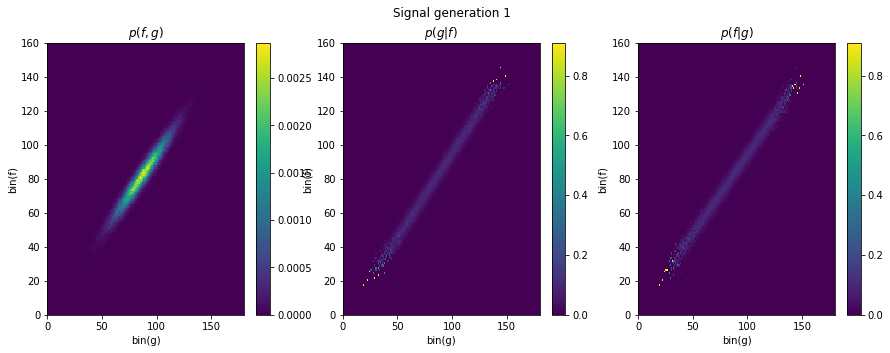

In [6]:
def compute_distributions(samples_f, samples_g, edges_f, edges_g):
    p_f = probability_one_variable(samples_f, edges_f)
    p_g = probability_one_variable(samples_g, edges_g)
    p_f_and_g, p_f_given_g, p_g_given_f = probability_two_variables(
        samples_f, 
        samples_g,
        edges_f,
        edges_g
    )
    
    return p_f, p_g, p_f_and_g, p_f_given_g, p_g_given_f


def display_distributions(p_f_and_g, p_f_given_g, p_g_given_f):
    p_f_and_g_im = axs[0].pcolormesh(p_f_and_g)
    plt.colorbar(p_f_and_g_im, ax=axs[0])
    axs[0].set_xlabel("bin(g)")
    axs[0].set_ylabel("bin(f)")
    axs[0].set_title("$p(f, g)$")

    p_g_given_f_im = axs[1].pcolormesh(p_g_given_f)
    plt.colorbar(p_g_given_f_im, ax=axs[1])
    axs[1].set_xlabel("bin(g)")
    axs[1].set_ylabel("bin(f)")
    axs[1].set_title("$p(g | f)$")

    p_f_given_g_im = axs[2].pcolormesh(p_f_given_g)
    plt.colorbar(p_f_given_g_im, ax=axs[2])
    axs[2].set_xlabel("bin(g)")
    axs[2].set_ylabel("bin(f)")
    axs[2].set_title("$p(f | g)$")
    
    plt.show()

# Create signals
samples_f = np.random.normal(27, 15, (100000,))
samples_e = np.random.normal( 0,  4, (100000,))
samples_g = samples_f + samples_e
edges_f = np.arange(-55, 105+1)
edges_g = np.arange(-60, 120+1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Signal generation 1')

distrs = compute_distributions(samples_f, samples_g, edges_f, edges_g)
p_f, p_g, p_f_and_g, p_f_given_g, p_g_given_f = distrs
display_distributions(p_f_and_g, p_f_given_g, p_g_given_f)

In [7]:
# This cell contains hidden tests.


In [8]:
# This cell contains hidden tests.


In [9]:
# This cell contains tests.

# bins of unity width
np.testing.assert_allclose(np.sum(p_f), 1)
np.testing.assert_allclose(np.sum(p_g), 1)
np.testing.assert_allclose(np.sum(p_f_and_g), 1)

### Signal analysis 1
Calculate the corresponding distributions with $g = 20$
* *a priori* probability: $p(f)$ as a function of $f$
* likelihood probability: $p(g|f)$ as a function of $f$
* *a posteriori* probability $p(f|g)$ as a function of $f$

Display the result
* Plot *a priori* probability in the left subplot of `axs`
* Plot likelihood probability in the middle subplot of `axs`
* Plot *a posteriori* probability in the right subplot of `axs`
* Plot the maximum peak point of each probability function as a red cross in the subplots
* Show the location and value of the maximum peak point in the legend
* Add proper axis labels to the subplots
* Add proper titles to the subplots

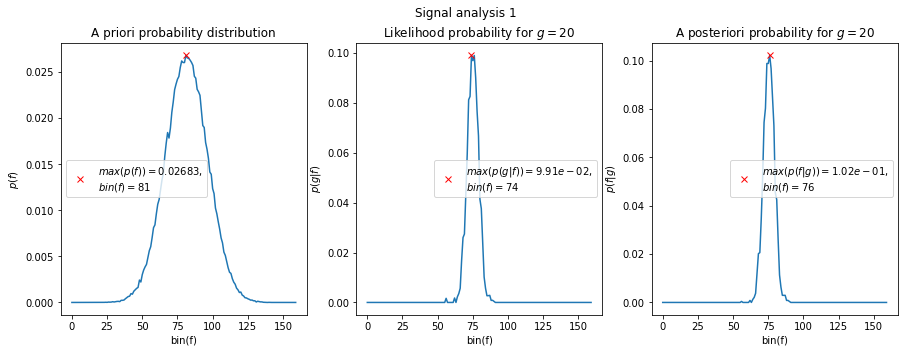

In [10]:
def display_distributions_analysis(prior, likelihood, posterior, g):
    peak_x, peak_y = np.argmax(prior), np.max(prior)
    axs[0].plot(prior)
    axs[0].plot(peak_x, peak_y, "rx", label=f"$max(p(f))={{{peak_y}}}$,\n$bin(f)={{{peak_x}}}$")
    axs[0].set_title("A priori probability distribution")
    axs[0].set_xlabel("bin(f)")
    axs[0].set_ylabel("$p(f)$")
    axs[0].legend()

    peak_x, peak_y = np.argmax(likelihood), np.max(likelihood)
    axs[1].plot(likelihood)
    axs[1].plot(peak_x, peak_y, "rx", label=f"$max(p(g|f))={{{peak_y:.2e}}}$,\n$bin(f)={{{peak_x}}}$")
    axs[1].set_title(f"Likelihood probability for $g={{{g}}}$")
    axs[1].set_xlabel("bin(f)")
    axs[1].set_ylabel("$p(g|f)$")
    axs[1].legend()

    peak_x, peak_y = np.argmax(posterior), np.max(posterior)
    axs[2].plot(posterior)
    axs[2].plot(peak_x, peak_y, "rx", label=f"$max(p(f|g))={{{peak_y:.2e}}}$,\n$bin(f)={{{peak_x}}}$")
    axs[2].set_title(f"A posteriori probability for $g={{{g}}}$")
    axs[2].set_xlabel("bin(f)")
    axs[2].set_ylabel("$p(f|g)$")
    axs[2].legend()

    plt.show()


# Extract the column corresponding to g=20
g = 20
bin_ix = np.digitize(g, edges_g) - 1
p_g_given_f_g20 = p_g_given_f[:, bin_ix]
p_f_given_g_g20 = p_f_given_g[:, bin_ix]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Signal analysis 1')

display_distributions_analysis(p_f, p_g_given_f_g20, p_f_given_g_g20, g)

In [11]:
# This cell contains hidden tests.


In [12]:
# This cell contains hidden tests.


### Signal generation 2
Create the signals as follows
* $f$ is a normally distributed scalar $f \sim 0.5 \mathcal{N}(27, 15^2) + 0.5\mathcal{N}(7, 5^2)$ (using `numpy.hstack()`)
* $\epsilon$ is a normally distributed scalar $\epsilon \sim \mathcal{N}(0, 4^2)$
* $A = 1$
* Save 100,000 samples of $f$ in the variable `samples_f` (as `numpy.array`)
* Save 100,000 samples of $\epsilon$ in the variable `samples_e` (as `numpy.array`)
* Save 100,000 samples of $g$ in the variable `samples_g` (as `numpy.array`)

Calculate the corresponding distributions using the implemented functions
* Define the bin edges for $f$: $[-55, -54, -53, ..., 105]$
* Define the bin edges for $g$: $[-60, -59, -58, ..., 120]$
* Save $p(f)$ in the variable `p_f` (as `numpy.array`)
* Save $p(g)$ in the variable `p_g` (as `numpy.array`)
* Save $p(f,g)$ in the variable `p_f_and_g` (as `numpy.array`)
* Save $p(g|f)$ in the variable `p_g_given_f` (as `numpy.array`)
* Save $p(f|g)$ in the variable `p_f_given_g` (as `numpy.array`)
 
Display the result (using `matplotlib.pyplot.pcolormesh()`)
* Plot `p_f_and_g` in the left subplot of `axs`
* Plot `p_g_given_f` in the middle subplot of `axs`
* Plot `p_f_given_g` in the right subplot of `axs`
* Show the colorbar of each subplot
* Add proper axis labels to the subplots
* Add proper titles to the subplots

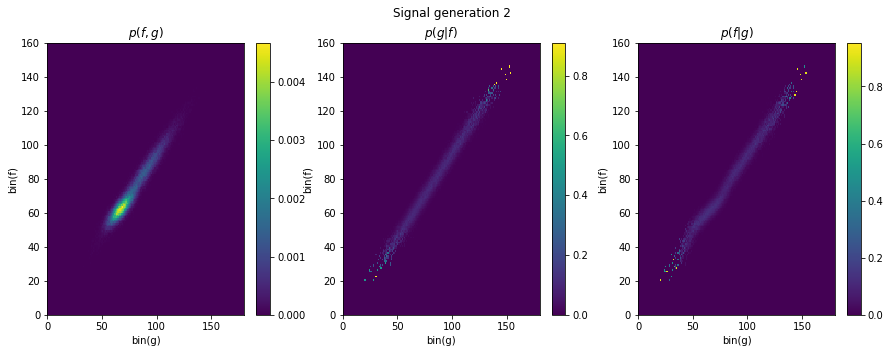

In [13]:
# Create signals
samples_f = np.hstack((
    np.random.normal(27, 15, (50000,)),
    np.random.normal( 7,  5, (50000,))
))
samples_e = np.random.normal( 0,  4, (100000,))
samples_g = samples_f + samples_e
edges_f = np.arange(-55, 105+1)
edges_g = np.arange(-60, 120+1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Signal generation 2')

distrs = compute_distributions(samples_f, samples_g, edges_f, edges_g)
p_f, p_g, p_f_and_g, p_f_given_g, p_g_given_f = distrs
display_distributions(p_f_and_g, p_f_given_g, p_g_given_f)

In [14]:
# This cell contains hidden tests.


In [15]:
# This cell contains hidden tests.


In [16]:
# This cell contains tests.

# bins of unity width
np.testing.assert_allclose(np.sum(p_f), 1)
np.testing.assert_allclose(np.sum(p_g), 1)
np.testing.assert_allclose(np.sum(p_f_and_g), 1)

### Signal analysis 2
Calculate the corresponding distributions with $g = 20$
* *a priori* probability: $p(f)$ as a function of $f$
* likelihood probability: $p(g|f)$ as a function of $f$
* *a posteriori* probability $p(f|g)$ as a function of $f$

Display the result
* Plot *a priori* probability in the left subplot of `axs`
* Plot likelihood probability in the middle subplot of `axs`
* Plot *a posteriori* probability in the right subplot of `axs`
* Plot the maximum peak point of each probability function as a red cross in the subplots
* Show the location and value of the maximum peak point in the legend
* Add proper axis labels to the subplots
* Add proper titles to the subplots

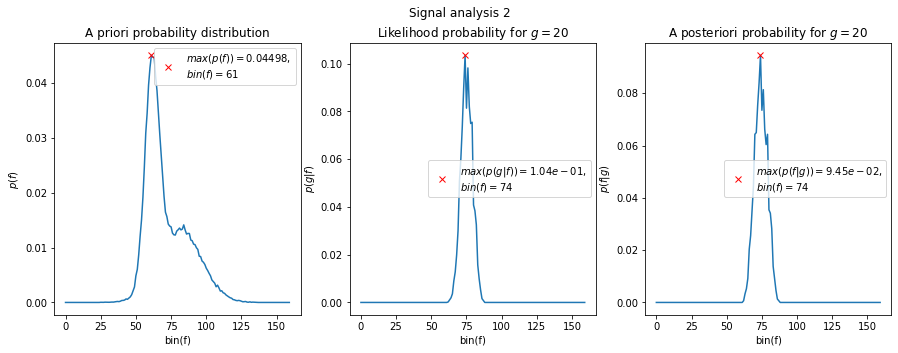

In [17]:
# Extract the column corresponding to g=20
g = 20
bin_ix = np.digitize(g, edges_g) - 1
p_g_given_f_g20 = p_g_given_f[:, bin_ix]
p_f_given_g_g20 = p_f_given_g[:, bin_ix]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Signal analysis 2')

display_distributions_analysis(p_f, p_g_given_f_g20, p_f_given_g_g20, g)

In [18]:
# This cell contains hidden tests.


In [19]:
# This cell contains hidden tests.
